In [1]:
from IPython.core.display import display, HTML
display(HTML(""))

C:\Users\genem\AppData\Local\Temp\ipykernel_22072\1626578490.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from tensorflow.keras.preprocessing import image
import os, shutil # Library for navigating files
# from google.colab import drive # Library to mount google drives
np.random.seed(1)

In [3]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [4]:
!python --version

Python 3.11.4


## Check Data Set
In this section I'm simply setting up directory path variables to stream data from disk into my model. This section follow the examples provided in the Deep Learning course Week 5.

In [6]:
base_dir = 'bvsc'

In [7]:
# Specify the traning, validation, and test dirrectories.
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [12]:
# Specify the the classess in the training, validataion, and test dirrectories
train_cfiles_dir = os.path.join(train_dir, 'cFiles')
train_bfiles_dir = os.path.join(train_dir, 'bFiles')

In [16]:
validation_cfiles_dir = os.path.join(validation_dir, 'cFiles')
validation_bfiles_dir = os.path.join(validation_dir, 'bFiles')

In [17]:
test_cfiles_dir = os.path.join(test_dir, 'cFiles')
test_bfiles_dir = os.path.join(test_dir, 'bFiles')

In [18]:
# Check the number of files in each class dirrectory
print(len(os.listdir(train_cfiles_dir)))
print(len(os.listdir(train_bfiles_dir)))
print(len(os.listdir(validation_cfiles_dir)))
print(len(os.listdir(validation_bfiles_dir)))
print(len(os.listdir(test_cfiles_dir)))
print(len(os.listdir(test_bfiles_dir)))

1000
1000
500
500
500
500


### Setup Data Generator
In this section we setup parameters for the image data flow from the directory structure.

In [25]:
# We need to normalize the pixels in the images.  The data will 'flow' through this generator.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Since the file images are in a directory we need to move them from the directory into the model.
# Keras as a function that makes this easy. Documentaion is here: https://keras.io/preprocessing/image/

train_generator = train_datagen.flow_from_directory(
    train_dir, # The directory where the train data is located
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels. This is important because it makes sure all images are the same size.
    batch_size=20, # We will take images in batches of 20.
    class_mode='binary') # The classification is binary.

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Note:** make sure to remove your .ipynb_checkpoints or any other hidden folders or files as this will cause the train generator to find more classes. [1]

In [27]:
# Build a plotting function
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

In [28]:
# Build a model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

In [23]:
model = Base_CNN()

Epoch 1/50
50/50 [==============================] - 6s 129ms/step - loss: 17.1442 - accuracy: 0.8650 - val_loss: 41.5892 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 6s 118ms/step - loss: 2.9648 - accuracy: 0.9400 - val_loss: 48.3632 - val_accuracy: 0.5000
Epoch 3/50
50/50 [==============================] - 6s 117ms/step - loss: 1.2821 - accuracy: 0.9770 - val_loss: 37.7226 - val_accuracy: 0.5000
Epoch 4/50
50/50 [==============================] - 6s 114ms/step - loss: 0.2793 - accuracy: 0.9790 - val_loss: 45.5793 - val_accuracy: 0.5000


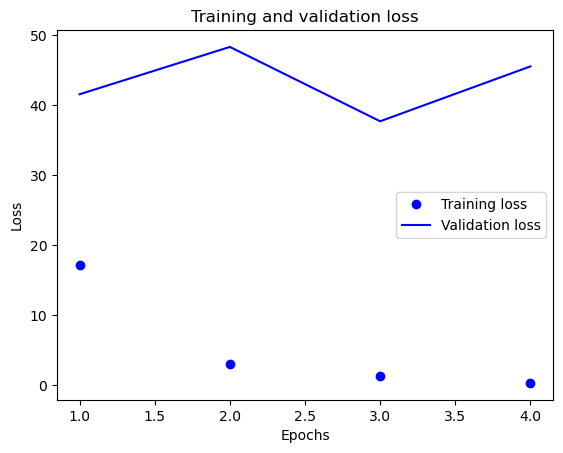

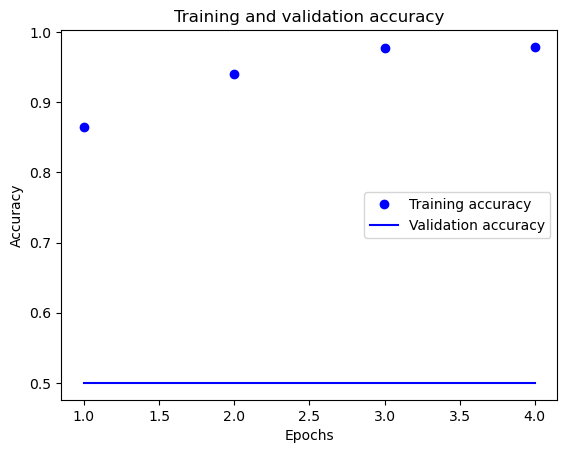

50/50 [==============================] - 2s 37ms/step - loss: 41.7981 - accuracy: 0.5000
test_acc: 0.5


In [29]:
history = model.fit( # The image data must come from the image generator that takes the images from the correct dirrectory. https://keras.io/models/sequential/
    train_generator, # Images are taken from the train_generator
    steps_per_epoch=50, # The number of steps from the train_generator before one epoch if finished.
                         # 100 steps * 20 batch size in train generator = 2000 training images per epoch. This way each traning image will be sampled once per epoch.
    epochs=50, # Train data for 50 epochs
    validation_data=validataion_generator, # Take data from the validataion generator
    validation_steps=50, # 50 steps * 20 batch size in validation generator = 1000 validation images per epoch
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)]) # We will not use call backs to stop early.

plot_history() # Use our plot function to plot the loss and accuracy.

test_loss, test_acc =model.evaluate(test_generator, steps = 50) # Test images are in a dirrectory so they must flow from dirrectory.
                                                                           # 50 steps * 20 batch size in test generator = 1000 test images per epoch
print('test_acc:', test_acc)

# Conclusion
The results of this notebook show only a 50% accuracy  of disntiquishing a bFile from cFile with a basic setup. Although, it's complete failure in regard to the end objective it does demonstrate a working setup from data selection, engineering, and model setup to build on. My thoughts on improvment lead me to a few options:
- Add more data, this would require finding and selecting more files. This would mean rather than select not only selecting files that are roughly in the same range of 150x150.  I could perhaps expand to files that are larger and resize as needed.
- Attempt data augmentation. This might help but would not simulate real world usage since images generated from file data is not organic in nature
- Experiment with parameters and layers.
- Experiment with transfer learning by leveraging pretrained models
- Any combination of the above

# Reference
1 Keras creating three classes instead of two. (n.d.). Stack Overflow. Retrieved February 9, 2024, from https://stackoverflow.com/questions/52609798/keras-creating-three-classes-instead-of-two

